# NLP and Detecting Fake News

In [ ]:
#helpful articles
#https://www.analyticsvidhya.com/blog/2019/12/detect-fight-neural-fake-news-nlp/
#https://medium.com/@Genyunus/detecting-fake-news-with-nlp-c893ec31dee8
#https://towardsdatascience.com/full-pipeline-project-python-ai-for-detecting-fake-news-with-nlp-bbb1eec4936d
#https://towardsdatascience.com/i-trained-fake-news-detection-ai-with-95-accuracy-and-almost-went-crazy-d10589aa57c
#https://www.datacamp.com/community/tutorials/scikit-learn-fake-news
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c/26980472#26980472
#http://www.fakenewschallenge.org/
#http://snap.stanford.edu/mis2/files/MIS2_paper_2.pdf
#https://openreview.net/pdf?id=G4auHKwZYP0
#https://medium.com/sciforce/googles-bert-changing-the-nlp-landscape-5f4a7bf65cc5

# Reading in Labeled Data

In [4]:
df = pd.read_csv('C:/Users/Manda/Documents/UiPath/Scraped_Articles_Upwork/scraped-my-own-labeling.csv')

#csv of Florida cities and counties
citydf = pd.read_csv ('C:/Users/Manda/Documents/Perspecta/Florida_city_county.csv')

# Labeling Data

### Pulling out "ABOUT" label from content

Created a loop to create topic labels for each content piece. However, I also did manually add some "About" labels to rows that were missing. I was encouraged to add additional labels to data after the start project.

In [5]:
gov_list = ['Trump', 'DeSantis', 'Carlos', 'Biden','Gimenez', 'Kriseman', 'Castor', 'Pence', 
            'Centers', 'Center', 'CDC', 'administration', 'president', 'Rubio', 'Scott', 'governor', 'Fauci', 'officials']
healthcare_list = ['nurse', 'hospital', 'healthcare','doctor', 'VA', 'health', 'Dr.', 'Physician', 'physician']
public_list = ['public', 'business', 'mall', 'restaurant', 'crowd', 'people', 'designer', 'county', 'counties', 'student']
company_list = ['3M', 'Publix', 'Disney', 'Costco', 'Amazon', 'Etsy','AMC', 'Airlines', 'Ebay']
institution_list = ['prison', 'jail', 'inmate', 'school','institution', 'UF', 'University', 'UM', 'White', 
                    'WHO', 'Organization', 'defendants', 'inmates', 'police', 'officer', 'USF']
location_list = ['Florida', 'Baton', 'Wilmington', 'Cleveland', 'Tulsa', 'Philadelphia','Tulsa', 'York', 
                 'Flint', 'Oklahoma', 'Michigan','Austin', 'Phoenix', 'Island', 'Vegas', 'Tucson', 'Chicago']
#pplname_list = ['Meidel', 'Jason', 'Ryan', 'Adams', 'Alysse', 'Frank', 'Kevin', 'Mark', 'Matt']

In [ ]:
for index, doc in enumerate(df1['CONTENT']):
    sent = doc.split()
    about_label = []
    #print(sent[0])
    for item in sent:
        #print(item)
        if item in gov_list:
            #about_label.append(item)
            #print(places)
            df1.loc[index,'ABOUT'] = "Government"
        if item in healthcare_list:
            df1.loc[index,'ABOUT'] = "Healthcare"
        if item in public_list:
            df1.loc[index,'ABOUT'] = "Public"
        if item in company_list:
            df1.loc[index,'ABOUT'] = "Company"
        if item in institution_list:
            df1.loc[index,'ABOUT'] = "Institution"
        if item in city_list or item in county_list or item in location_list:
            df1.loc[index,'ABOUT'] = "Location"    
    

# CSV of current data labeled

This is the final labeled data after I finished the "ABOUT" labels that the loop did not label.

In [11]:
df1 = pd.read_csv('C:/Users/Manda/Documents/Perspecta/finished_labeling1.csv', encoding = "ISO-8859-1")
df1

,index,URL,DATE,TITLE,CONTENT,ABOUT,LABEL
0,0,https://www.tampabay.com/news/health/2020/04/0...,4-Apr,"Face coverings recommended, but Trump says he ...",The new guidance from the Centers for Disease ...,Government,YESMASK
1,1,https://www.tampabay.com/news/health/2020/04/0...,4-Apr,"Face coverings recommended, but Trump says he ...","The new guidance, announced as states are brac...",Government,NEUTRAL
2,2,https://www.tampabay.com/news/health/2020/04/0...,4-Apr,"Face coverings recommended, but Trump says he ...",Trump and other administration officials sough...,Government,YESMASK
3,3,https://www.tampabay.com/news/health/2020/04/0...,4-Apr,"Face coverings recommended, but Trump says he ...",I want to unpack the evolution of our guida...,Healthcare,NEUTRAL
4,4,https://www.tampabay.com/news/health/2020/04/0...,4-Apr,"Face coverings recommended, but Trump says he ...","Adams, who had repeatedly and publicly advised...",Public,YESMASK
...,...,...,...,...,...,...,...
2742,2742,https://www.wuft.org/news/2020/03/23/uf-to-lau...,23-Mar,"UF To Launch Coronavirus Testing, Research","Additionally, amid major concerns about the vi...",Government,NEUTRAL
2743,2743,https://www.wuft.org/news/2020/03/23/uf-to-lau...,23-Mar,"UF To Launch Coronavirus Testing, Research",We want all nursing homes and ALFs (assiste...,Public,YESMASK
2744,2744,https://www.wuft.org/news/2020/03/23/florida-u...,23-Mar,"Florida, U.S. Theater And Movie Houses Struggl...","Ariella Elkobi, 19, a film major at Florida At...",Location,YESMASK
2745,2745,https://www.wuft.org/news/2020/03/21/i-tried-t...,21-Mar,I Tried To Get Tested For COVID-19 In Alachua ...,"When I described my symptoms, the receptionist...",Healthcare,YESMASK


# Using StandfordCore NLP

Remove html tags from content.  
I also downloaded the 'en' version of StanfordNLP library for my own computer

In [2]:
#removehtml from column
import pandas as pd
from bs4 import BeautifulSoup
import re

def removehtml(row):
    row = re.sub('<[^<]+?>', '', str(row))
    return row

df1['CONTENT'] = df1['CONTENT'].apply(removehtml)


NameError: name 'df1' is not defined

In [95]:
#https://www.analyticsvidhya.com/blog/2019/02/stanfordnlp-nlp-library-python/
import stanfordnlp
#stanfordnlp.download('en')

In [96]:
nlp = stanfordnlp.Pipeline(processors = "tokenize,mwt,lemma,pos")

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\Manda\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'C:\\Users\\Manda\\stanfordnlp_resources\\en_ewt_models\\en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: pos
With settings: 
{'model_path': 'C:\\Users\\Manda\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tagger.pt', 'pretrain_path': 'C:\\Users\\Manda\\stanfordnlp_resources\\en_ewt_models\\en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---


### Tokenization

The token object contains the index of the token in the sentence and a list of word objects (in case of a multi-word token). Each word object contains useful information, like the index of the word, the lemma of the text, the pos (parts of speech) tag and the feat (morphological features) tag.

In [112]:
#doc.sentences[0].print_tokens()

### Lemmatization & Parts of Speech

Lemmatized the Content column and retrieved proper nouns from content for analysis later.

In [270]:
pos_dict = {
'CC': 'coordinating conjunction','CD': 'cardinal digit','DT': 'determiner',
'EX': 'existential there (like: \"there is\" ... think of it like \"there exists\")',
'FW': 'foreign word','IN':  'preposition/subordinating conjunction','JJ': 'adjective \'big\'',
'JJR': 'adjective, comparative \'bigger\'','JJS': 'adjective, superlative \'biggest\'',
'LS': 'list marker 1)','MD': 'modal could, will','NN': 'noun, singular \'desk\'',
'NNS': 'noun plural \'desks\'','NNP': 'proper noun, singular \'Harrison\'',
'NNPS': 'proper noun, plural \'Americans\'','PDT': 'predeterminer \'all the kids\'',
'POS': 'possessive ending parent\'s','PRP': 'personal pronoun I, he, she',
'PRP$': 'possessive pronoun my, his, hers','RB': 'adverb very, silently,',
'RBR': 'adverb, comparative better','RBS': 'adverb, superlative best',
'RP': 'particle give up','TO': 'to go \'to\' the store.','UH': 'interjection errrrrrrrm',
'VB': 'verb, base form take','VBD': 'verb, past tense took',
'VBG': 'verb, gerund/present participle taking','VBN': 'verb, past participle taken',
'VBP': 'verb, sing. present, non-3d take','VBZ': 'verb, 3rd person sing. present takes',
'WDT': 'wh-determiner which','WP': 'wh-pronoun who, what','WP$': 'possessive wh-pronoun whose',
'WRB': 'wh-abverb where, when','QF' : 'quantifier, bahut, thoda, kam (Hindi)','VM' : 'main verb',
'PSP' : 'postposition, common in indian langs','DEM' : 'demonstrative, common in indian langs'
}

In [271]:
def extract_lemma(doc):
    #for index,doc in enumerate(doc):
    for index, doc in enumerate(df1['CONTENT']):
        doc = nlp(doc)
        lemma_text = []
        word_pos = []
        for sent in doc.sentences:
            for wrd in sent.words:
                #parsed_text.append(wrd.text)
                lemma_text.append(wrd.lemma)
                if wrd.pos == 'NNP' or wrd.pos == 'NNPS' in pos_dict.keys():
                    #pos_exp = pos_dict[wrd.pos]
                    word_pos.append(wrd.text)
            df1.loc[index,'LEMMA'] = str(lemma_text)
            df1.loc[index,'WORD_POS'] = str(word_pos)
    #return stuff
            #print(sent)


df1['CONTENT'].apply(extract_lemma)        

KeyboardInterrupt: 

### Get index of words surrounding "mask" (+-8)

After running through the classification model, I was encouraged to narrow the content to strings surrounding the word "mask". After randomly sampling 10 pieces of data, I decided 8 was an approximate number that captured the sentiment for the word "mask".

In [273]:
import re
for index, row in df1.iterrows():
    sentence = (row['LEMMA'])
    words = re.findall(r'\w+', str(sentence))
    #print(words)
    maskwrd = 'mask'  
    masklesswrd = 'maskless'
    unmaskedwrd = 'unmasked'
    facemaskwrd = 'facemask'
    if maskwrd not in words and masklesswrd not in words and unmaskedwrd not in words and facemaskwrd not in words:
        df1.loc[index,'MASK_CONTENT'] = "NA" 

    elif maskwrd in words:
        wrd_index =  words.index('mask') 
        if wrd_index >= 7:
            left = words[wrd_index - 8:wrd_index+1]
        if wrd_index < 7:
            left = words[0:wrd_index+1]
        if len(words) >= wrd_index:
            right = words[wrd_index + 1:wrd_index + 9]
        if len(words) < wrd_index+9:
            right = words[wrd_index:len(words)]
        df1.loc[index,'MASK_CONTENT'] = str(left+right) 
    elif masklesswrd in words:
        wrd_index =  words.index('maskless') 
        if wrd_index >= 7:
            left = words[wrd_index - 8:wrd_index+1]
        if wrd_index < 7:
            left = words[0:wrd_index+1]
        if len(words) >= wrd_index:
            right = words[wrd_index + 1:wrd_index + 9]
        if len(words) < wrd_index+9:
            right = words[wrd_index:len(words)]
        df1.loc[index,'MASK_CONTENT'] = str(left+right) 
    elif unmaskedwrd in words:
        wrd_index =  words.index('unmasked') 
        if wrd_index >= 7:
            left = words[wrd_index - 8:wrd_index+1]
        if wrd_index < 7:
            left = words[0:wrd_index+1]
        if len(words) >= wrd_index:
            right = words[wrd_index + 1:wrd_index + 9]
        if len(words) < wrd_index+9:
            right = words[wrd_index:len(words)]
        df1.loc[index,'MASK_CONTENT'] = str(left+right)
    elif facemaskwrd in words:
        wrd_index =  words.index('facemask') 
        if wrd_index >= 7:
            left = words[wrd_index - 8:wrd_index+1]
        if wrd_index < 7:
            left = words[0:wrd_index+1]
        if len(words) >= wrd_index:
            right = words[wrd_index + 1:wrd_index + 9]
        if len(words) < wrd_index+9:
            right = words[wrd_index:len(words)]
        df1.loc[index,'MASK_CONTENT'] = str(left+right)      
        


# For Filtering Politicians in R

The following code allowed me to pull out prominent politicians in the data for the sole purpose of easily filtering for them in the R-Shiny Dashboard. 

In [73]:
for index, doc in enumerate(df1['CONTENT']):
    #doc = str(doc)
    sent = doc.split()
    #print(sent)
    for item in sent:
        if "Trump" in item:
            df1.loc[index,'POLITICIAN'] = str("Trump" )
        if "Biden" in item:
            df1.loc[index,'POLITICIAN'] = str("Biden") 
        if "DeSantis" in item:
            df1.loc[index,'POLITICIAN'] = str("DeSantis")
        if "Kriseman" in item:
            df1.loc[index,'POLITICIAN'] = str("Kriseman")    
        if "Castor" in item:
            df1.loc[index,'POLITICIAN'] = str("Castor")
        if "Suarez" in item:
            df1.loc[index,'POLITICIAN'] = str("Suarez") 
        if "Curry" in item and "West" in item:
            df1.loc[index,'POLITICIAN'] = str("Curry") 
        if "Rubio" in item:
            df1.loc[index,'POLITICIAN'] = str("Rubio")     
        if "Fauci" in item:
            df1.loc[index,'POLITICIAN'] = str("Fauci")      
    
        

In [74]:
#df1.to_csv (r'C:/Users/Manda/Documents/Perspecta/final1.csv', index = False)

### Pulling out FL Cities and Counties from content

Listen....I know for sure there is a more efficient way to do this. However, I couldn't figure it out in time before I presented the dashboard. So, in order to merely get the results I needed, I did it the elongated way. I'll make this more efficient after the presentation :) 

In [1]:
df1 = pd.read_csv('C:/Users/Manda/Documents/Perspecta/ShinyApp/diff_shiny_app/final1.csv', encoding = "ISO-8859-1")
#df1

NameError: name 'pd' is not defined

In [138]:
for index, doc in enumerate(df1['LEMMA']):
    #doc = str(doc)
    sent = doc.split()
    #print(sent)
    st = 'St.'
    boca = "Boca"
    raton = "Raton"
    lauderdale = "Lauderdale"
    city_list = citydf['City'].tolist()
    county_list = citydf['County'].tolist()
    places = []
    for item in sent:
        if st in item:
            df1.loc[index,'PLACES_CITY'] = str("St Petersburg" )
        if lauderdale in item:
            df1.loc[index,'PLACES_CITY'] = str("Ft. Lauderdale") 
        if "Boca" in item and "Raton" in item:
            df1.loc[index,'PLACES_CITY'] = str("Boca Raton")
        if "Palm" in item and "Beach" in item:
            df1.loc[index,'PLACES_CITY'] = str("Palm Beach")    
        if "De" in item and "Land" in item:
            df1.loc[index,'PLACES_CITY'] = str("De Land")
        if "Fort" in item and "Myers" in item:
            df1.loc[index,'PLACES_CITY'] = str("Fort Myers") 
        if "Key" in item and "West" in item:
            df1.loc[index,'PLACES_CITY'] = str("Key West") 
        if "Key" in item and "Biscayne" in item:
            df1.loc[index,'PLACES_CITY'] = str("Key Biscayne") 
        if "Polk" in item and "City" in item:
            df1.loc[index,'PLACES_CITY'] = str("Polk City") 
        if "St." in item and "Augustine" in item:
            df1.loc[index,'PLACES_CITY'] = str("St. Augustine")   
        if "Winter" in item and "Garden" in item:
            df1.loc[index,'PLACES_CITY'] = str("Winter Garden") 
        if "Miami" in item and "Dade" in item:
            df1.loc[index,'PLACES_CITY'] = str("Miami-Dade")
        if "USF" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of South Florida")
        if "University" in item and "South" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of South Florida")
        if "UCF" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of Central Florida")
        if "University" in item and "Central" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of Central Florida")
        if "UF" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of Florida")
        if "University" in item and "Florida" in item:
            df1.loc[index,'PLACES_CITY'] = str("University of Florida")
        if "FSU" in item:
            df1.loc[index,'PLACES_CITY'] = str("Florida State University") 
        if "Florida" in item and "State" in item:
            df1.loc[index,'PLACES_CITY'] = str("Florida State University")
        if "FAU" in item:
            df1.loc[index,'PLACES_CITY'] = str("Florida Atlantic University") 
        if "Florida" in item and "Atlantic" in item and "University" in item:
            df1.loc[index,'PLACES_CITY'] = str("Florida Atlantic University") 
        if "UM" in item:
            df1.loc[index,'PLACES_CITY'] = str("Miami University")
        if "Miami" in item and "University" in item:
            df1.loc[index,'PLACES_CITY'] = str("Miami University")
        if "FIU" in item:
             df1.loc[index,'PLACES_CITY'] = str("Florida International University")
        if "Tampa" in item:
            df1.loc[index,'PLACES_CITY'] = str("Tampa")
        if "Miami" in item:
            df1.loc[index,'PLACES_CITY'] = str("Miami") 
        if "Clearwater" in item:
            df1.loc[index,'PLACES_CITY'] = str("Clearwater")
        if "Gainesville" in item:
            df1.loc[index,'PLACES_CITY'] = str("Gainesville")
        if "Jacksonville" in item:
            df1.loc[index,'PLACES_CITY'] = str("Jacksonville")       
            

In [276]:
for index, doc in enumerate(df1['CONTENT']):
    #doc = str(doc)
    sent = doc.split()
    #print(sent)
    city_list = citydf['City'].tolist()
    county_list = citydf['County'].tolist()
    places = []
    for item in sent:
        if item in city_list or item in county_list:
            places.append(item)
            df1.loc[index,'PLACES_'] = str(places)  
        if "University of Florida" in item:
            df1.loc[index,'PLACES_'] = str("University of Florida")    
        

In [279]:
#graphing locations based on newspaper
for index, doc in enumerate(df1['URL']):
    #doc = str(doc)
    sent = doc.split()
    #print(sent)
    tampa = "www.tampabay"
    wfla = "www.wfla.com"
    orlando = "www.orlandos"
    miami = "www.miamiher"
    sunsent = "www.sun-sent"
    wuft = "www.wuft.org"
    flkeys = "www.flkeysne"
    for item in sent:
        if tampa in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Tampa Bay")
            df1.loc[index,'NEWS'] = str("Tampa Bay Times")
        if wfla in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Clearwater") 
            df1.loc[index,'NEWS'] = str("WFLA")
        if orlando in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Orlando")
            df1.loc[index,'NEWS'] = str("Orlando Sentinel")
        if miami in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Miami") 
            df1.loc[index,'NEWS'] = str("Miami Herald")
        if sunsent in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Deerfield Beach") 
            df1.loc[index,'NEWS'] = str("Sun Sentinel")
        if wuft in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Gainesville")
            df1.loc[index,'NEWS'] = str("WUFT")
        if flkeys in item[7:20]:
            df1.loc[index,'PLACES_URL'] = str("Key West")     
            df1.loc[index,'NEWS'] = str("FL Keys News")

In [143]:
#df1.to_csv (r'C:/Users/Manda/Documents/Perspecta/shinyApp/diff_shiny_app/final2.csv', index = False)

### Keras Embedding Layer

One Hot Encoding the labels for "ABOUT" and "LABEL"

In [47]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [48]:
df1['LABEL'] = df1['LABEL'].astype('category')
df1['LABEL_FLOAT'] = df1['LABEL'].cat.codes
#df1.LABEL_FLOAT.unique()
df1['ABOUT'] = df1['ABOUT'].astype('category')
df1['ABOUT_FLOAT'] = df1['ABOUT'].cat.codes

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
mask_labels = encoder.fit_transform(df1['LABEL_FLOAT'])
mask_labels

about_labels = encoder.fit_transform(df1['ABOUT_FLOAT'])
about_labels

array([2, 2, 2, ..., 5, 3, 6], dtype=int64)

### Start making the model LABEL_FLOAT

Model for LABEL_FLOAT

In [50]:
df1 = df1[df1['LABEL_FLOAT'] >= 0] 
df1 = df1[df1['ABOUT_FLOAT'] >= 0] 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df1
sentences = df1['MASK_CONTENT'].values
y = df1['LABEL_FLOAT'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.5, shuffle=True,random_state=1000)


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [52]:
y = df1['LABEL_FLOAT'].unique
y

<bound method Series.unique of 0       2
1       0
2       2
3       0
4       2
       ..
2740    0
2741    2
2742    2
2743    2
2744    2
Name: LABEL_FLOAT, Length: 2745, dtype: int8>

### Model for ABOUT_FLOAT

Model for ABOUT_FLOAT

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df1
sentences_about = df1['LEMMA'].values
y_about = df1['ABOUT_FLOAT'].values

sentences_train_about, sentences_test_about, y_train_about, y_test_about = train_test_split(sentences_about, y_about, test_size=0.5, shuffle=True,random_state=1000)


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train_about)

X_train_about = vectorizer.transform(sentences_train_about)
X_test_about  = vectorizer.transform(sentences_test_about)
X_train_about

<1372x5122 sparse matrix of type '<class 'numpy.int64'>'
	with 42911 stored elements in Compressed Sparse Row format>

In [54]:
y_about = df1['ABOUT_FLOAT'].unique
y_about

<bound method Series.unique of 0       2
1       2
2       2
3       3
4       6
       ..
2740    2
2741    6
2742    5
2743    3
2744    6
Name: ABOUT_FLOAT, Length: 2745, dtype: int8>

### LABEL_FLOAT Model with 10 epochs


In [55]:
inputs = keras.Input(shape=(2614,), name="digits")
x = layers.Dense(128, activation="relu", name="dense_1")(inputs)
x = layers.Dense(128, activation="relu", name="dense_2")(x)
x = layers.Dense(64, activation="relu", name="dense_3")(x)
x = layers.Dense(8, activation="relu", name="dense_4")(x)
x = layers.Dense(8, activation="relu", name="dense_5")(x)
outputs = layers.Dense(3, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [208]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [60]:
#https://www.tensorflow.org/guide/keras/train_and_evaluate
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_test, y_test),
)

Fit model on training data


NameError: name 'X_train' is not defined

In [1921]:
print(history.history.keys())

dict_keys(['val_loss', 'val_sparse_categorical_accuracy', 'loss', 'sparse_categorical_accuracy'])


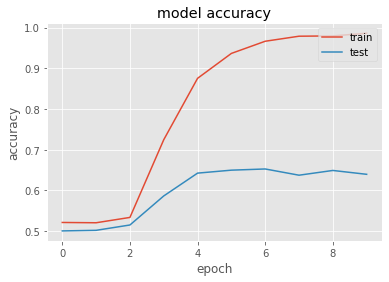

In [1922]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

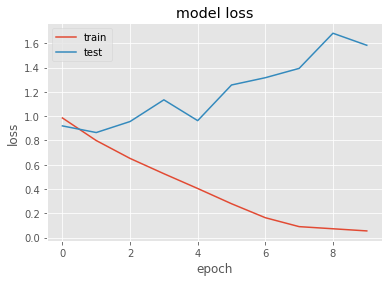

In [1923]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ABOUT_LABEL with 10 epochs

ABOUT_LABEL

In [213]:
inputs = keras.Input(shape=(5090,), name="digits")
x = layers.Dense(128, activation="relu", name="dense_1")(inputs)
x = layers.Dense(128, activation="relu", name="dense_2")(x)
x = layers.Dense(64, activation="relu", name="dense_3")(x)
x = layers.Dense(8, activation="relu", name="dense_4")(x)
x = layers.Dense(8, activation="relu", name="dense_5")(x)
outputs = layers.Dense(7, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [214]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [215]:
print("Fit model on training data")
history = model.fit(
    X_train_about,
    y_train_about,
    batch_size=64,
    epochs=10,
    validation_data=(X_test_about, y_test_about),
)

Fit model on training data
Train on 1371 samples, validate on 1372 samples
Epoch 1/10
1371/1371 [==============================] - 1s 479us/sample - loss: 1.8486 - sparse_categorical_accuracy: 0.3355 - val_loss: 1.7724 - val_sparse_categorical_accuracy: 0.3827
Epoch 2/10
1371/1371 [==============================] - 0s 264us/sample - loss: 1.6370 - sparse_categorical_accuracy: 0.4544 - val_loss: 1.6687 - val_sparse_categorical_accuracy: 0.4235
Epoch 3/10
1371/1371 [==============================] - 0s 261us/sample - loss: 1.3810 - sparse_categorical_accuracy: 0.5077 - val_loss: 1.6804 - val_sparse_categorical_accuracy: 0.4337
Epoch 4/10
1371/1371 [==============================] - 0s 266us/sample - loss: 1.1793 - sparse_categorical_accuracy: 0.5266 - val_loss: 1.7168 - val_sparse_categorical_accuracy: 0.4220
Epoch 5/10
1371/1371 [==============================] - 0s 263us/sample - loss: 1.0104 - sparse_categorical_accuracy: 0.5748 - val_loss: 1.8021 - val_sparse_categorical_accuracy: 0.

In [200]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [216]:
stuff = pd.options.display.precision
stuff

6

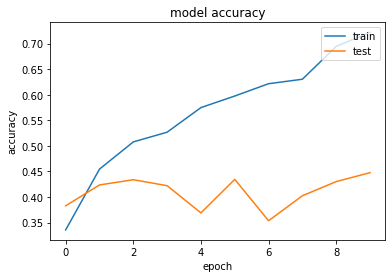

In [217]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

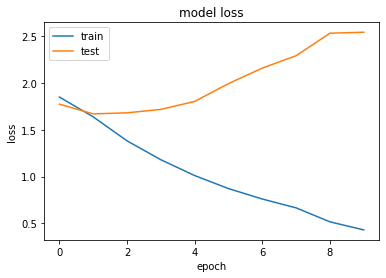

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Other Models I tried

In [1930]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(cv_fitfull,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1931]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
scores = cross_val_score(clf, cv_fitfull, y, cv=3)
scores

array([0.64480874, 0.67759563, 0.65027322])

In [1932]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.03)


### MultinomialNB

In [1934]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

my_tags = ['1', '2', '3']

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())
              ])
nb.fit(X_test, y_test)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [1937]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7074235807860262
              precision    recall  f1-score   support

           1       0.99      0.57      0.72       212
           2       1.00      0.14      0.25       127
           3       0.63      1.00      0.78       348

    accuracy                           0.71       687
   macro avg       0.88      0.57      0.58       687
weighted avg       0.81      0.71      0.66       687



### Quick EDA

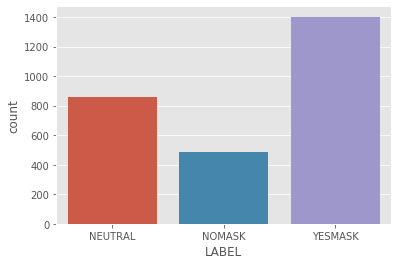

In [1938]:
import seaborn as sns
sns.countplot(df1['LABEL']);

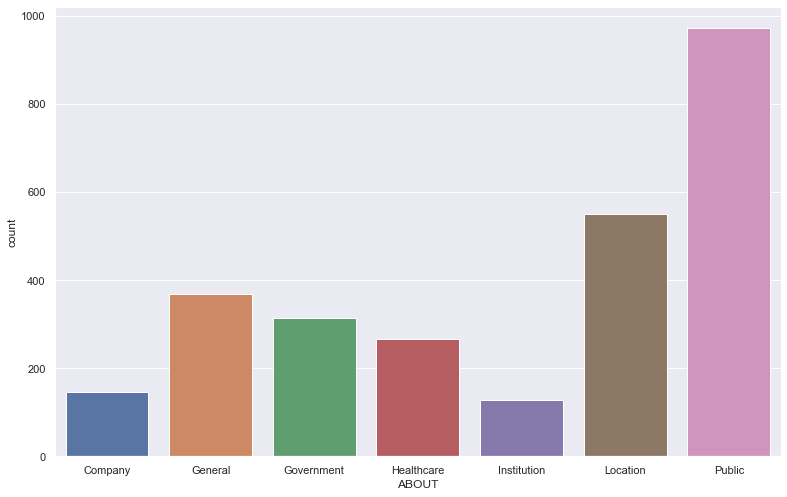

In [65]:
import seaborn as sns
#figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(df1['ABOUT']);
sns.set(rc={'figure.figsize':(12,8.27)})

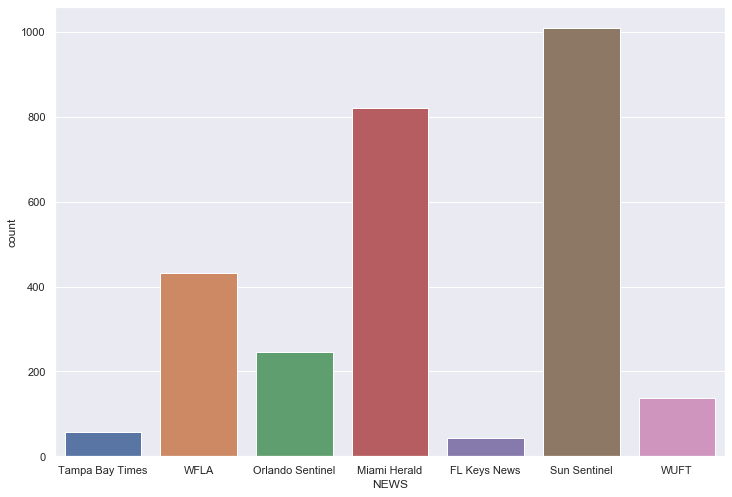

In [66]:
sns.countplot(df1['NEWS']);
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Shot at ELMO

In [502]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from sklearn import preprocessing

!python -m spacy download en_core_web_md 
import spacy
from spacy.lang.en import English
from spacy import displacy
nlp = spacy.load('en_core_web_md')
from IPython.display import HTML
import logging
logging.getLogger('tensorflow').disabled = True

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
